# CNN (keras example) on mnist (from keras's examples)

This is https://github.com/fchollet/keras/blob/master/examples/mnist_cnn.py

In [3]:
import os
#os.environ['THEANO_FLAGS']='mode=FAST_RUN,device=gpu,floatX=float32'
#os.environ['THEANO_FLAGS']='mode=FAST_COMPILE,device=gpu,floatX=float32'
os.environ['THEANO_FLAGS']='device=gpu0'

In [4]:
import theano
print theano.config.device

Couldn't import dot_parser, loading of dot files will not be possible.
gpu0


Using gpu device 0: Tesla M2075


In [5]:
from __future__ import absolute_import
from __future__ import print_function
import pylab as pl
import matplotlib.cm as cm
import numpy as np
np.random.seed(1337) # for reproducibility

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.utils import np_utils

'''
    Train a simple convnet on the MNIST dataset.

    Run on GPU: THEANO_FLAGS=mode=FAST_RUN,device=gpu,floatX=float32 python mnist_cnn.py

    Get to 99.25% test accuracy after 12 epochs (there is still a lot of margin for parameter tuning).
    16 seconds per epoch on a GRID K520 GPU.
'''

'\n    Train a simple convnet on the MNIST dataset.\n\n    Run on GPU: THEANO_FLAGS=mode=FAST_RUN,device=gpu,floatX=float32 python mnist_cnn.py\n\n    Get to 99.25% test accuracy after 12 epochs (there is still a lot of margin for parameter tuning).\n    16 seconds per epoch on a GRID K520 GPU.\n'

In [6]:
np.set_printoptions(precision=5, suppress=True)

In [7]:
%matplotlib inline

In [8]:
batch_size = 128
nb_classes = 10
nb_epoch = 12

# the data, shuffled and split between tran and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")
X_train /= 255
X_test /= 255
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

X_train shape: (60000, 1, 28, 28)
60000 train samples
10000 test samples


label :  [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]


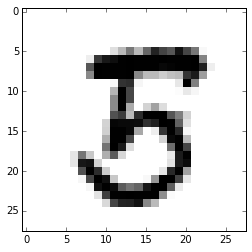

In [9]:
i = 4600
pl.imshow(X_train[i, 0], interpolation='nearest', cmap=cm.binary)
print("label : ", Y_train[i,:])

In [10]:
model = Sequential()

model.add(Convolution2D(32, 1, 3, 3, border_mode='full')) 
model.add(Activation('relu'))
model.add(Convolution2D(32, 32, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(poolsize=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(32*196, 128))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(128, nb_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adadelta')

In [11]:
model.fit(X_train, Y_train, batch_size=batch_size, nb_epoch=nb_epoch,
          show_accuracy=True, verbose=1, validation_data=(X_test, Y_test))
score = model.evaluate(X_test, Y_test, show_accuracy=True, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1]) 

Train on 60000 samples, validate on 10000 samples
Epoch 0
60000/60000 [==============================] - 79s - loss: 0.2596 - acc: 0.9200 - val_loss: 0.0548 - val_acc: 0.9826
Epoch 1
60000/60000 [==============================] - 79s - loss: 0.0961 - acc: 0.9713 - val_loss: 0.0441 - val_acc: 0.9861
Epoch 2
60000/60000 [==============================] - 79s - loss: 0.0735 - acc: 0.9782 - val_loss: 0.0426 - val_acc: 0.9860
Epoch 3
60000/60000 [==============================] - 79s - loss: 0.0617 - acc: 0.9816 - val_loss: 0.0330 - val_acc: 0.9885
Epoch 4
60000/60000 [==============================] - 79s - loss: 0.0513 - acc: 0.9844 - val_loss: 0.0277 - val_acc: 0.9913
Epoch 5
60000/60000 [==============================] - 79s - loss: 0.0467 - acc: 0.9859 - val_loss: 0.0305 - val_acc: 0.9895
Epoch 6
60000/60000 [==============================] - 79s - loss: 0.0416 - acc: 0.9868 - val_loss: 0.0291 - val_acc: 0.9911
Epoch 7
60000/60000 [==============================] - 79s - loss: 0.0377 -

In [15]:
print(model.predict(X_test[1:5]))
print(Y_test[1:5])

[[ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]]
[[ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]]


In [16]:
Y_pred = model.predict(X_test)
# Convert one-hot to index
y_pred = np.argmax(Y_pred, axis=1)

In [18]:
from sklearn.metrics import classification_report


print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.99      0.99      0.99       980
          1       0.99      1.00      1.00      1135
          2       0.99      0.99      0.99      1032
          3       0.98      1.00      0.99      1010
          4       0.99      0.99      0.99       982
          5       0.99      0.99      0.99       892
          6       0.99      0.99      0.99       958
          7       0.99      0.99      0.99      1028
          8       1.00      0.98      0.99       974
          9       0.99      0.98      0.99      1009

avg / total       0.99      0.99      0.99     10000

